In [7]:
require(data.table)
require(tidyverse)
require(ggExtra)

## 1. Read data 
From [Binary_comp](./Binary_comp.ipynb)

In [3]:
res.transcript_level<- readRDS("../dat/1901/res.transcript_level.rds")

### 1.1 Alpha data

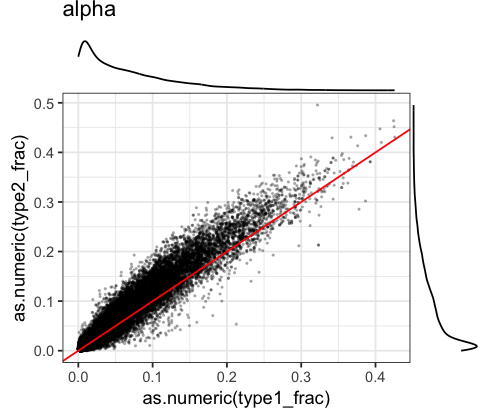

In [8]:
options(repr.plot.width=4, repr.plot.height=3.5)
require(ggExtra)
p <- ggplot(res.transcript_level$alpha, aes(as.numeric(type1_frac),
                                      as.numeric(type2_frac))) +
    geom_point(alpha=.25,size=.25) + theme_bw()+
    geom_abline(slope = 1,intercept = 0,color='red')+ggtitle("alpha")
# add marginal histograms
ggExtra::ggMarginal(p, type = "density")

### 1.2 beta data

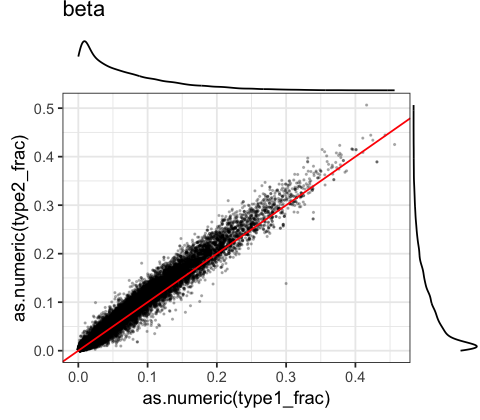

In [9]:
options(repr.plot.width=4, repr.plot.height=3.5)
require(ggExtra)
p <- ggplot(res.transcript_level$beta, aes(as.numeric(type1_frac),
                                      as.numeric(type2_frac))) +
    geom_point(alpha=.25,size=.25) + theme_bw()+
    geom_abline(slope = 1,intercept = 0,color='red')+ggtitle("beta")
# add marginal histograms
ggExtra::ggMarginal(p, type = "density")

## 2 results

### 2.1 odds  + padj thresholding: alpha cells

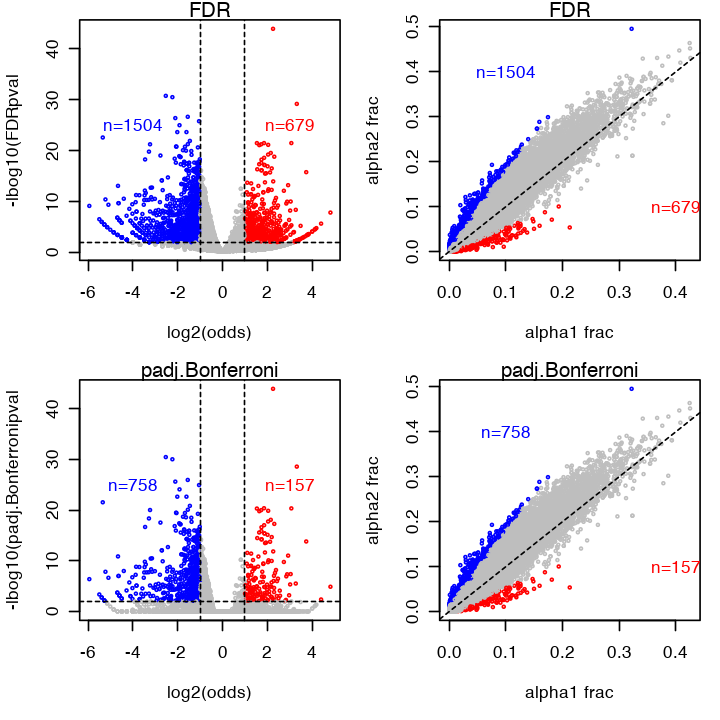

In [5]:
require(ggplot2)
options(repr.plot.width=6, repr.plot.height=6)
require(LSD)
res.genes_level.a.df <- res.transcript_level$alpha
par(mar=c(5,4,1,1),mfrow = c(2,2))
for(m in c("FDR","padj.Bonferroni")){
    up<- res.genes_level.a.df[,m] <0.01 & log2(res.genes_level.a.df$odds)>1
    down<-res.genes_level.a.df[,m] <0.01 & log2(res.genes_level.a.df$odds)< -1
plot(x=log2(res.genes_level.a.df$odds),y=-log10(as.numeric(res.genes_level.a.df[,m])),
     xlab = "log2(odds)",ylab=paste0('-lbog10(',m,'pval'),cex=.25,
     col=ifelse(up,"red",ifelse(down,"blue","grey")),
     main = m)
abline(h = 2,col=1,lty=2)
abline(v=c(-1,1),col=1,lty=2)
text(-4,25,col='blue',labels = paste0("n=",sum(down)))
text(3,25,col='red',labels = paste0("n=",sum(up)))

# scatter 
plot(x=as.numeric(res.genes_level.a.df$type1_frac),y=as.numeric(res.genes_level.a.df$type2_frac),
     xlab = "alpha1 frac",ylab='alpha2 frac',cex=.25,
     col=ifelse(up,"red",ifelse(down,"blue","grey")),
     main = m)
abline(a=0,b = 1,col=1,lty=2)
text(.1,.4,col='blue',labels = paste0("n=",sum(down)))
text(.4,.1,col='red',labels = paste0("n=",sum(up)))
}



# MAplot
if(F){
    plot(y=log2(res.genes_level.a.df$odds),x=as.numeric(res.genes_level.a.df$type1_frac),
            ylab = "log2(odds)",xlab='apha1 frac',cex=.25,col='grey',pch=16,
            main = '')

    abline(h = c(-1,1),col=2,lty=2)

}

#ggplot(res.genes_level.a.df,aes(odds,-log10(FDR)))+geom_point()

### 2.2 remove odds thresholding give more high genes at the high opening fractions
**The odds thresholding will remove the genes appeared on large fraction** 

Loading required package: LSD


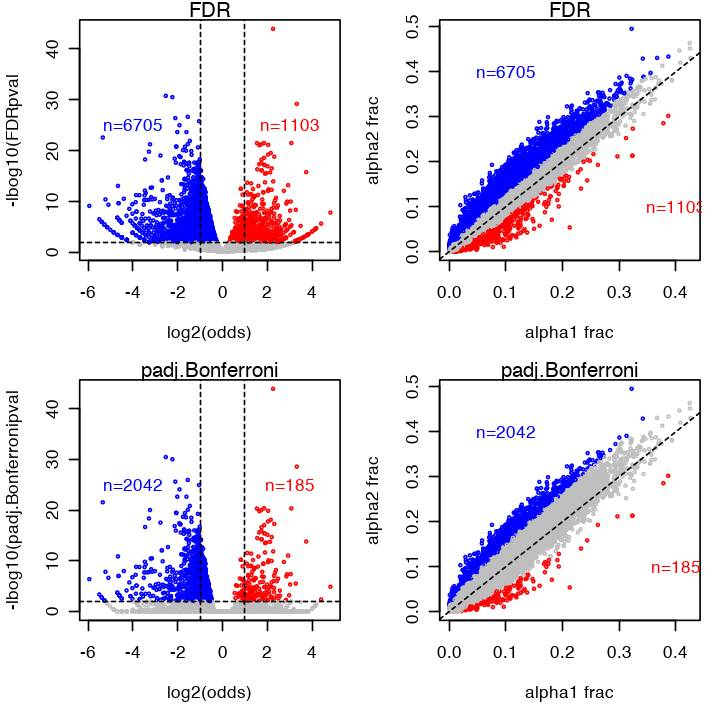

In [4]:
# without ODDs threshold
require(ggplot2)
options(repr.plot.width=6, repr.plot.height=6)
require(LSD)
res.genes_level.a.df <- res.transcript_level$alpha
par(mar=c(5,4,1,1),mfrow = c(2,2))
for(m in c("FDR","padj.Bonferroni")){
    up<- res.genes_level.a.df[,m] <0.01 & res.genes_level.a.df[,"odds"]>1
    down<-res.genes_level.a.df[,m] <0.01 & res.genes_level.a.df[,"odds"]<1
plot(x=log2(res.genes_level.a.df$odds),y=-log10(as.numeric(res.genes_level.a.df[,m])),
     xlab = "log2(odds)",ylab=paste0('-lbog10(',m,'pval'),cex=.25,
     col=ifelse(up,"red",ifelse(down,"blue","grey")),
     main = m)
abline(h = 2,col=1,lty=2)
abline(v=c(-1,1),col=1,lty=2)
text(-4,25,col='blue',labels = paste0("n=",sum(down)))
text(3,25,col='red',labels = paste0("n=",sum(up)))

# scatter 
plot(x=as.numeric(res.genes_level.a.df$type1_frac),y=as.numeric(res.genes_level.a.df$type2_frac),
     xlab = "alpha1 frac",ylab='alpha2 frac',cex=.25,
     col=ifelse(up,"red",ifelse(down,"blue","grey")),
     main = m)
abline(a=0,b = 1,col=1,lty=2)
text(.1,.4,col='blue',labels = paste0("n=",sum(down)))
text(.4,.1,col='red',labels = paste0("n=",sum(up)))
}



#### Beta cells

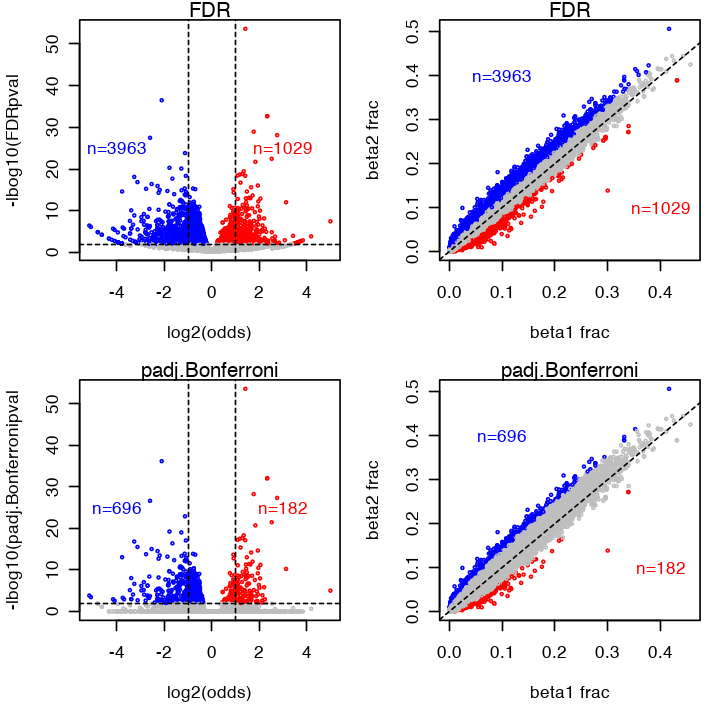

In [8]:
require(ggplot2)
options(repr.plot.width=6, repr.plot.height=6)
require(LSD)
res.genes_level.a.df <- res.transcript_level$beta
par(mar=c(5,4,1,1),mfrow = c(2,2))
for(m in c("FDR","padj.Bonferroni")){
    up<- res.genes_level.a.df[,m] <0.01 & res.genes_level.a.df[,"odds"]>1
    down<-res.genes_level.a.df[,m] <0.01 & res.genes_level.a.df[,"odds"]<1
plot(x=log2(res.genes_level.a.df$odds),y=-log10(as.numeric(res.genes_level.a.df[,m])),
     xlab = "log2(odds)",ylab=paste0('-lbog10(',m,'pval'),cex=.25,
     col=ifelse(up,"red",ifelse(down,"blue","grey")),
     main = m)
abline(h = 2,col=1,lty=2)
abline(v=c(-1,1),col=1,lty=2)
text(-4,25,col='blue',labels = paste0("n=",sum(down)))
text(3,25,col='red',labels = paste0("n=",sum(up)))

# scatter 
plot(x=as.numeric(res.genes_level.a.df$type1_frac),y=as.numeric(res.genes_level.a.df$type2_frac),
     xlab = "beta1 frac",ylab='beta2 frac',cex=.25,
     col=ifelse(up,"red",ifelse(down,"blue","grey")),
     main = m)
abline(a=0,b = 1,col=1,lty=2)
text(.1,.4,col='blue',labels = paste0("n=",sum(down)))
text(.4,.1,col='red',labels = paste0("n=",sum(up)))
}



### 2.3 select genes 

In [10]:
binary.glist <- list()
m<-"padj.Bonferroni"

## alpha
res.genes_level.a.df<- res.transcript_level$alpha
up<- res.genes_level.a.df[,m] <0.001 & res.genes_level.a.df[,"odds"]>1
down<-res.genes_level.a.df[,m] <0.001 & res.genes_level.a.df[,"odds"]<1
binary.glist$alpha1_tr <- rownames(res.genes_level.a.df)[up]
binary.glist$alpha1 <- sapply(rownames(res.genes_level.a.df)[up],function(x) unlist(strsplit(x,split = "_"))[1])
binary.glist$alpha2 <- sapply(rownames(res.genes_level.a.df)[down],function(x) unlist(strsplit(x,split = "_"))[1])
binary.glist$alpha2_tr <- rownames(res.genes_level.a.df)[down]                             

binary.glist$alpha1 <- unique(binary.glist$alpha1)
binary.glist$alpha2 <- unique(binary.glist$alpha2)

## beta                             
res.genes_level.a.df<- res.transcript_level$beta
up<- res.genes_level.a.df[,m] <0.001 & res.genes_level.a.df[,"odds"]>1
down<-res.genes_level.a.df[,m] <0.001 & res.genes_level.a.df[,"odds"]<1
binary.glist$beta1_tr <- rownames(res.genes_level.a.df)[up]
binary.glist$beta1<- sapply(rownames(res.genes_level.a.df)[up],function(x) unlist(strsplit(x,split = "_"))[1])
binary.glist$beta2<- sapply(rownames(res.genes_level.a.df)[down],function(x) unlist(strsplit(x,split = "_"))[1])
binary.glist$beta2_tr <- rownames(res.genes_level.a.df)[down]                             
binary.glist$beta1 <- unique(binary.glist$beta1)
binary.glist$beta2 <- unique(binary.glist$beta2)

saveRDS(binary.glist,file = '../dat/1901/binary.glist_001.Rds')
t(unlist(lapply(binary.glist,length)))

alpha1_tr,alpha1,alpha2,alpha2_tr,beta1_tr,beta1,beta2,beta2_tr
143,138,1452,1497,120,117,430,438


### 2.4 prepare genes for go

In [9]:
binary.glist <- readRDS('../dat/1901/binary.glist.Rds')
t(unlist(lapply(binary.glist,length)))

alpha1_tr,alpha1,alpha2,alpha2_tr,beta1_tr,beta1,beta2,beta2_tr
185,179,1967,2042,182,178,682,696


In [ ]:
require(data.table)
require(biomaRt)
ensembl = useEnsembl(biomart="ensembl", dataset="hsapiens_gene_ensembl")
for(i in c("alpha1","alpha2","beta1","beta2")){
    fn <- paste0("../dat/1901/glist_",i,".csv")
    fwrite(getBM(attributes=c('ensembl_gene_id','hgnc_symbol'), 
                 filters ='hgnc_symbol', values = binary.glist[[i]] , mart = ensembl),file=fn)
}


Loading required package: biomaRt
Batch submitting query [===============>---------------]  50% eta:  1s

### 2.5 save data for plot

In [11]:
pd <- rbind(data.frame(res.transcript_level$alpha[, c("odds", "padj.Bonferroni")], 
    celltype = "alpha"), data.frame(res.transcript_level$beta[, c("odds", "padj.Bonferroni")], 
    celltype = "beta")) %>% rownames_to_column("gene_tr.idx") %>% separate(gene_tr.idx, 
    into = c("Gene", "tr.idx"), sep = "_", remove = F)
fwrite(pd,'../dat/figdata/fig2_prom_ttest_res.csv')